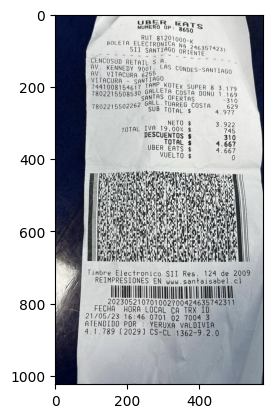

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from pprint import pprint
from pytesseract import Output

img = cv2.imread('../images/1c5e5931-8337-40bb-9ff6-3718b941c902.JPG')

plt.imshow(img)
plt.show()

## Grayscale

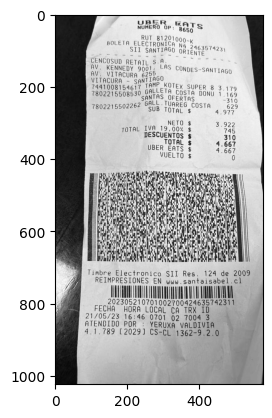

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

## Thresholding - separate the image into regions of interest

125.0


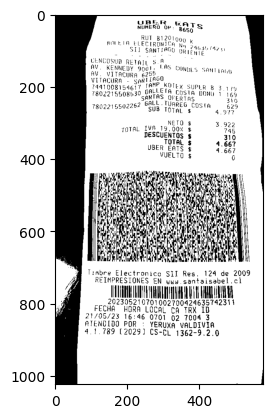

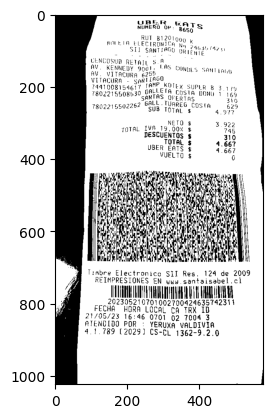

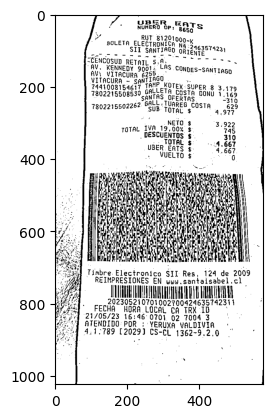

In [31]:

# otsu method -> to get the threshold value
# https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
otsu_value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(otsu_value)
plt.imshow(otsu, cmap='gray')
plt.show()

# normnal thresholding using the otsu value
value, thresh = cv2.threshold(gray, otsu_value, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

# adaptive thresholding (mean)
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 11)
plt.imshow(adaptive_average, cmap='gray')
plt.show()

# gaussian adaptive thresholding

